# VIX30d v/s HV+20d

El VIX toma expectativas anualizadas de 23-37 días, las cuales pueden ser llevadas a un valor mensual, por otro lado, HV corresponde a volatilidad realizada de un periodo de tiempo, la cual se puede mensualizar o anualizar. Sabiendo que el VIX son expectativas de 1 mes aproximadamente, es factible contrarrestar con lo que realmente sucede en los próximos 20 días (1 mes = 20 días de trading). En este estudio compararemos la volatilidad mensual realizada del SPX con el VIX ajustado a 30 días o mensual.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # para trabajar y manipular fechas en gráficos de matplotlib

import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

#### OBTENIENDO DATOS

In [2]:
assets = ['^SPX', '^VIX']
df = pdr.get_data_yahoo(assets, period='max')['Adj Close'].dropna().reset_index()
df['log returns'] = np.log(df['^SPX']/df['^SPX'].shift())
df

[*********************100%***********************]  2 of 2 completed


,Date,^SPX,^VIX,log returns
0,1990-01-02,359.690002,17.240000,NaN
1,1990-01-03,358.760010,18.190001,-0.002589
2,1990-01-04,355.670013,19.219999,-0.008650
3,1990-01-05,352.200012,20.110001,-0.009804
4,1990-01-08,353.790009,20.260000,0.004504
...,...,...,...,...
8468,2023-08-14,4489.720215,14.820000,0.005734
8469,2023-08-15,4437.859863,16.459999,-0.011618
8470,2023-08-16,4404.330078,16.780001,-0.007584
8471,2023-08-17,4370.359863,17.889999,-0.007743


#### MENSUALIZANDO VOLATILIDAD

In [3]:
# mensualizando VIX
df['VIX30d'] = df['^VIX']/np.sqrt(12)

# calculando HV de los próximos 20 días (1 mes)
df['HV+20d'] = df['log returns'].shift(-20).rolling(20).std() *np.sqrt(20) *100

#### VIX v/s HV

In [4]:
# diferencia entre VIX y HV o VIX menos HV
df['dif VIX-HV'] = df['VIX30d'] - df['HV+20d']

In [5]:
# Crear una columna para indicar si HV > VIX, esto creará datos booleanos
df['HV>VIX'] = df['HV+20d'] > df['VIX30d']

In [6]:
# filtrar datos entre 2002 y 2022
inicio = '2002-01-01'
fin = '2022-12-31'

dfFilt = df[(df['Date']>=inicio) & (df['Date']<=fin)]
dfFilt

,Date,^SPX,^VIX,log returns,VIX30d,HV+20d,dif VIX-HV,HV>VIX
3028,2002-01-02,1154.670044,22.709999,0.005724,6.555812,4.759000,1.796812,False
3029,2002-01-03,1165.270020,21.340000,0.009138,6.160327,4.668530,1.491797,False
3030,2002-01-04,1172.510010,20.450001,0.006194,5.903407,5.122832,0.780575,False
3031,2002-01-07,1164.890015,21.940001,-0.006520,6.333533,5.113166,1.220366,False
3032,2002-01-08,1160.709961,21.830000,-0.003595,6.301778,5.120121,1.181658,False
...,...,...,...,...,...,...,...,...
8310,2022-12-23,3844.820068,20.870001,0.005851,6.024650,4.738642,1.286008,False
8311,2022-12-27,3829.250000,21.650000,-0.004058,6.249817,4.768186,1.481631,False
8312,2022-12-28,3783.219971,22.139999,-0.012093,6.391267,4.499946,1.891322,False
8313,2022-12-29,3849.280029,21.440001,0.017311,6.189195,4.554493,1.634702,False


#### ESTUDIOS+PLOT

In [8]:
# obetiendo el porcentaje de veces que HV+20d fue mayor que VIX30d
pctTrue = (dfFilt['HV>VIX'].value_counts(normalize=True) *100).round(2)
print(pctTrue)

False    84.21
True     15.79
Name: HV>VIX, dtype: float64


Entre 2000 y 2022 solo en el 16% de las ocaciones la volatilidad mensual fue mayor que el VIX ajustado a 30 días, por ende, el 84% de las veces el VIX exagerá lo que ocurre realmente con la volatilidad del SPX. 

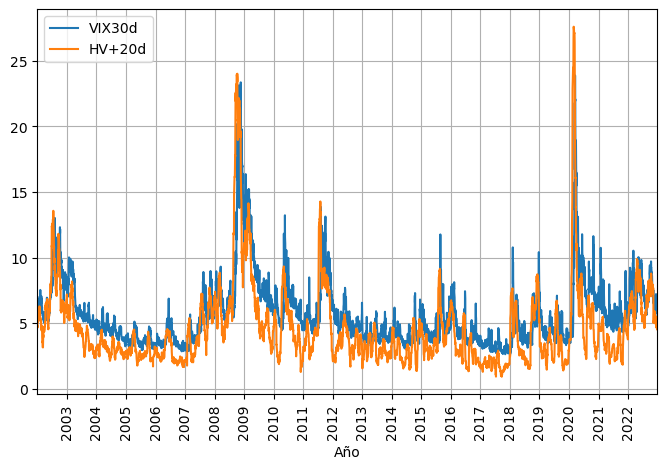

In [10]:
# plot VIX30d y HV+20d
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(dfFilt['Date'], dfFilt['VIX30d'], label='VIX30d')
ax.plot(dfFilt['Date'], dfFilt['HV+20d'], label='HV+20d')

date_format = mdates.DateFormatter('%Y')  # creando objeto con formato de fecha (solo años)
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.YearLocator()) # asegura que se muestren todas las fechas de los años en el eje X

plt.xticks(rotation=90)
plt.margins(x=0) # ajustar espacios en blanco del gráfico
plt.xlabel('Año')
plt.grid()
plt.legend(loc=2) 

plt.show()

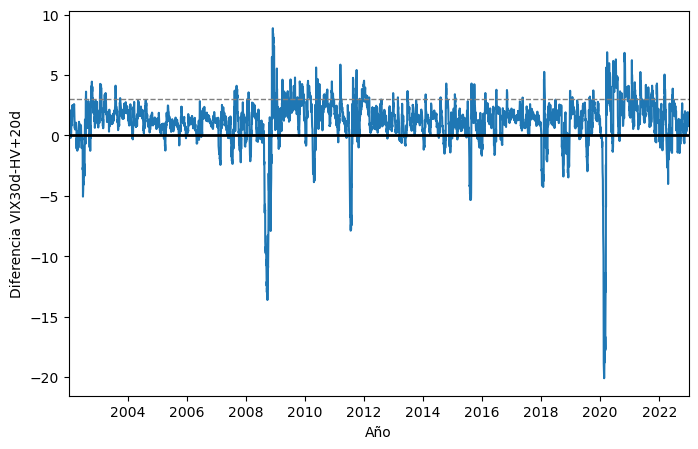

In [11]:
# plot VIX30d menos HV+20d, o diferencial de volatilidades
plt.figure(figsize=(8, 5))
plt.plot(dfFilt['Date'], dfFilt['dif VIX-HV'])

plt.axhline(y=0, color='black', linewidth=2)
plt.axhline(y=3, color='grey', linestyle='--', linewidth=1)

plt.ylabel('Diferencia VIX30d-HV+20d')
plt.xlabel('Año')
plt.margins(x=0)

plt.show()

La gran mayoria de las veces el VIX30d es mayor que el volatilidad mensual en 0-3 puntos. Se aprecia de igual forma, que cuando la diferencia es notablemente negativa, es decir, HV+20d>VIX30d, se debe a situaciones complejas (fines del 2008 y principios del 2020). 

Veamos esta distrubución en profundidad. 

In [27]:
# Distribución de la diferencia entre volatilidades.

# aproximando los puntos de diferencia entre VIX y HV a números enteros
ptsDif = dfFilt['dif VIX-HV'].round()
ptsDif = ptsDif.apply(lambda x: 0 if x == -0.0 else x)
ptsDif = ptsDif.astype(int)
ptsDif

3028    2
3029    1
3030    1
3031    1
3032    1
       ..
8310    1
8311    1
8312    2
8313    2
8314    2
Name: dif VIX-HV, Length: 5287, dtype: int32

In [28]:
ptsDif.describe()

count    5287.000000
mean        1.112729
std         2.167626
min       -20.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: dif VIX-HV, dtype: float64

El valor o diferencial mínimo es -20 y el máximo es 9.

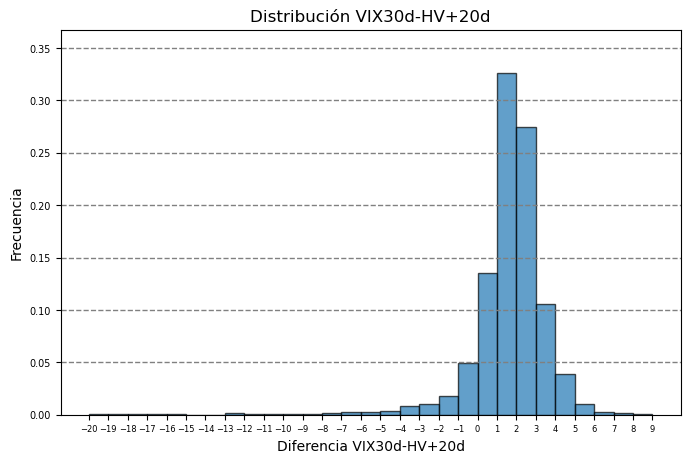

In [29]:
plt.figure(figsize=(8, 5))

bins=np.arange(-20, 9+1, 1)

plt.hist(ptsDif, bins=bins, density=True, edgecolor='black', alpha=0.7)

plt.xticks(bins, fontsize=7)
plt.yticks(fontsize=7)
plt.title('Distribución VIX30d-HV+20d')
plt.xlabel('Diferencia VIX30d-HV+20d')
plt.ylabel('Frecuencia')

plt.axhline(y=0.05, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.10, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.15, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.20, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.25, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.30, linestyle='--', linewidth=1, color='grey')
plt.axhline(y=0.35, linestyle='--', linewidth=1, color='grey')

plt.show()

Aunque las mayores diferencias registradas se dan cuando la volatilidad realizada mensual es mayor que el VIX30d, estos son casos que ocurren con muy poca frecuencia, como vimos, mayormente en periodos de crash. La gran mayoria del diferencial mensual se agrupa entre 0 puntos (10-15% de las veces), 1-2 puntos (+30% y +25% de las veces respectivamente) y 3 puntos (un poco más del 10%).